## LeetCode

### 未分类

#### 回文数

In [108]:
def isPalindrome(x: int) -> bool:
    x = list(str(x))
    isPal = True
    while len(x)>1 and isPal:
        if x.pop()!=x.pop(0):
            return False
    return isPal

In [110]:
isPalindrome(12321)

True

In [107]:
list(str(1234)).pop(0)

'1'

#### 罗马数字转换

In [123]:
class Solution:
    def __init__(self):
        self.rodict = {'I':1,'V':5,'X':10,'L':50,'C':100,'D':500,'M':1000}
    def romanToInt(self, s: str) -> int:
        # 从右至左，从个位数开始
        roman = list(s)
        intval = 0
        last_add = 0
        while len(roman)>0:
            temp = roman.pop()
            # 先看是否特殊情况（根据特殊情况的左部分检查），再加起来
            if temp in self.rodict:
                add_val =self.rodict[temp]
                if (add_val == 1 and (last_add ==5 or last_add ==10)) or add_val == 10 and (last_add ==50 or last_add ==100) or  (add_val == 100 and (last_add ==500 or last_add ==1000)):
                    intval -= add_val
                else:
                    # 若均不是则正常加起来
                    intval += add_val
                    last_add = add_val
        return intval

In [122]:
sol = Solution()
sol.romanToInt('CDXIV')

414

别人的答案
+ 第一个优点是发现只要比这个小，就减一
+ 第二是很清晰，从左到右进行，i<len-1是怕index超出

In [124]:
class Solution:
    def romanToInt(self, s):
        """
        :type s: str
        :rtype: int
        """
        a = {'I':1, 'V':5, 'X':10, 'L':50, 'C':100, 'D':500, 'M':1000}        
        ans=0        
        for i in range(len(s)):            
            if i<len(s)-1 and a[s[i]]<a[s[i+1]]:                
                ans-=a[s[i]]
            else:
                ans+=a[s[i]]
        return ans

#### 最长公共前缀

若只有一个元素，则直接返回
这次还是一个数组切片的问题，`    while not foundlongest and pos<=min_len:`最后不能-1，因为数组切片已经忽略最后一个元素了

In [41]:
def longestCommonPrefix(strs):
    pos = 1
    prefix = ''
    foundlongest = False
    if len(strs) ==1:
        return strs[0]
    min_len = min([len(i) for i in strs])
    while not foundlongest and pos<=min_len:
        for i in range(len(strs)):
            # 若前后两个值不等，则退出循环，并设置为True
            if i!=len(strs)-1:
                print(strs[i][:pos],strs[i+1][:pos])
            if i!=len(strs)-1 and strs[i][:pos]!=strs[i+1][:pos]:
                foundlongest = True
                break
        # 若循环结束均相等，则更新前缀，并pos+1
        if not foundlongest:
            prefix = strs[0][:pos]
            pos+=1
    return prefix

In [42]:
longestCommonPrefix(strs =["ab", "a"])

a a


'a'

网友答案：利用python的zip函数，把str看成list然后把输入看成二维数组，左对齐纵向压缩，然后把每项利用集合去重，之后遍历list中找到元素长度大于1之前的就是公共前缀

In [5]:
list(zip("ab", "a",'abc','da'))

[('a', 'a', 'a', 'd')]

In [8]:
list(zip(*['ab','cd','abc','da']))

[('a', 'c', 'a', 'd'), ('b', 'd', 'b', 'a')]

In [55]:
list(map(set, zip(*["ab", "a",'abc','ada'])))

[{'a'}]

In [12]:
def longestCommonPrefix(strs):
    if not strs: return ""
    ss = list(map(set, zip(*strs)))
    res = ""
    for x in ss:
        x = list(x)
        if len(x) > 1:
            break
        res = res + x[0]
    return res

In [14]:
longestCommonPrefix(["adb", "ad",'adbc','ada'])

'ad'

#### 有效的括号

In [100]:
def isValid(s: str) -> bool:
    valid = True
    alist = []
    fuhao = {'(':')','{':'}','[':']',}
    for i in s:
        if i in fuhao.keys():
            alist.append(i)
            print(alist)
        elif i in fuhao.values():
            if alist == [] or fuhao[alist.pop()]!=i:
                valid = False
                break
            # 若alist还有值，则失败
    if alist!=[]:
        valid = False
    return valid

In [102]:
isValid("(")

['(']


False

#### 搜索插入位置

In [108]:
a=[1,2,3,4,5]
def seq_search(list_search,target):
    index = 0
    found = False
    first = 0
    # 这里为什么要-1？？？
    # 防止index溢出，有可能取到len值
    last = len(list_search)-1
    while not found:
        # 是last+first，不是减号！！
        # round因为是0.5所以可用，但是最好用//
        temp_pos = round((last+first)/2)
        if list_search[temp_pos] == target:
            index = temp_pos
            return index
        elif list_search[temp_pos] > target:
            # 我所没做到的就在这个+1上
            last = temp_pos-1
        else:
            first = temp_pos+1
        if first>last:
            if list_search[temp_pos] > target:
                index= temp_pos
            else:
                index= temp_pos+1
            return index
        print(temp_pos,first,last)
    return index

In [111]:
seq_search(a,0)

2 0 1


0

#### 两数相加  ——出现问题，通过不了

In [13]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
    
    def hasnext():
        if self.next!=None:
            return True
        else:
            return False

def addTwoNumbers(l1: ListNode, l2: ListNode) -> ListNode:
    add_val = 0
    base = 1
    while l1!=None and l2!=None:
        add_val = add_val+base*(l1.val+l2.val)
        l1,l2=[l1.next,l2.next]
        base*=10
    while l1!=None:
        l1 = l1.next
        add_val = add_val+l1.val
        base*=10
    while l2!=None:
        l2 = l2.next
        add_val = add_val+l2.val
        base*=10
    # 转化为字符串并反转
    str_val = str(add_val)[::-1]
    ini_node = ListNode()
    tempnode = ini_node
    # 创建新的Node
    for i in range(len(str_val)):
        tempnode.next = ListNode(int(str_val[i]))
        tempnode = tempnode.next
    return ini_node

In [16]:
l1 = ListNode(2,ListNode(4,ListNode(3)))
l2 = ListNode(5,ListNode(6,ListNode(4)))
addTwoNumbers(l1,l2).next.next.val

0

#### 3. 无重复字符的最长子串

首先判断有无重复字符

In [19]:
a = 'ab'
def no_dup(s):
    if len(set(a))!=len(a):
        return False
    else:
        return True
no_dup(a)

True

In [21]:
list(range(1))

[0]

此方法字符串不能过长，否则出现问题

In [56]:
def lengthOfLongestSubstring(s: str) -> int:
#     if len(s)<=1:
#         return len(s)
    # 判断有无重复字符
    def no_dup(st):
        if len(set(st))!=len(st):
            return False
        else:
            return True
    found = False
    len_slice = len(s)
    while not found:
        for i in range(len(s)-len_slice+1):
#             print(s[i:i+len_slice])
            if no_dup(s[i:i+len_slice]):
                return len_slice
        len_slice-=1
lengthOfLongestSubstring(' a')

2

网友方法
+ 解决我的困惑点是，在遇到重复后，切片刀之前重复点+1的地方，这样保留了之前不重复的长度

In [ ]:
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        a = []
        res = 0
        for i in s:
            if i in a:
                a = a[a.index(i)+1:]
            a.append(i)
            res = res if len(a) < res else len(a)
        return res

In [60]:
list('sssa').pop()

'a'

In [65]:
def is_sym(s):
    ls = list(s)
    while len(ls)>1:
        if ls.pop(0)!=ls.pop():
            return False
    return True
is_sym('abba')

True

In [ ]:
    def longestPalindrome(self, s: str) -> str:
        def is_sym(s):
            ls = list(s)
            while len(ls)>1:
                if ls.pop(0)!=ls.pop():
                    return False
            return True
        found = False
        len_slice = len(s)
        while not found:
            for i in range(len(s)-len_slice+1):
                if is_sym(s[i:i+len_slice]):
                    return s[i:i+len_slice]
            len_slice-=1

#### 26. 删除有序数组中的重复项

In [5]:
def removeDuplicates(nums) -> int:
    del_nums = 0
    for i in range(len(nums)-1):
        if nums[i]==nums[i+1]:
            # 若相等，则把i换到前面delnum个的位置，最后删除
            nums.insert(del_nums,nums.pop(i))
            del_nums+=1
    nums = nums[del_nums:]
    print(nums)
    return len(nums)
removeDuplicates([1,1,2,2,4,4,5])

[1, 2, 4, 5]


4

#### 27. 移除元素

In [ ]:
class Solution:def removeElement(self, nums: List[int], val: int) -> int:
    pos = 0
    for i in range(len(nums)):
        if nums[i]!=val:
            nums[pos] = nums[i]
            pos+=1
    print(nums)
    return pos

#### 35. 搜索插入位置

``` javascript
nums = [1,3,5,6], target = 7
var searchInsert = function(nums, target) {
    for(let i in nums){
    if(nums[i]>=target){
        return i
    }
}
    return nums.length
};
```

#### 28. 实现 strStr()
实现 strStr() 函数。

给你两个字符串 haystack 和 needle ，请你在 haystack 字符串中找出 needle 字符串出现的第一个位置（下标从 0 开始）。如果不存在，则返回  -1 。

 

说明：

当 needle 是空字符串时，我们应当返回什么值呢？这是一个在面试中很好的问题。

对于本题而言，当 needle 是空字符串时我们应当返回 0 。这与 C 语言的 strstr() 以及 Java 的 indexOf() 定义相符。

```go
package main

import "fmt"

func main() {
	haystack := "aaa"
	needle := "aaaa"
	fmt.Print(strStr(haystack, needle))
}

func strStr(haystack string, needle string) int {
	for i := 0; i < len(haystack); i++ {
		// 临时指针，指向原字符串的比较位置
		tmp := i
		for j := 0; j < len(needle); j++ {
			if haystack[tmp] == needle[j] {
				if j == len(needle)-1 {
					return i
				}
				tmp++
				if tmp == len(haystack) {
					break
				}
				continue
			}
			break
		}
	}
	return -1
}

```

#### 824. 山羊拉丁文
给你一个由若干单词组成的句子 sentence ，单词间由空格分隔。每个单词仅由大写和小写英文字母组成。

请你将句子转换为 “山羊拉丁文（Goat Latin）”（一种类似于 猪拉丁文 - Pig Latin 的虚构语言）。山羊拉丁文的规则如下：

如果单词以元音开头（'a', 'e', 'i', 'o', 'u'），在单词后添加"ma"。
例如，单词 "apple" 变为 "applema" 。
如果单词以辅音字母开头（即，非元音字母），移除第一个字符并将它放到末尾，之后再添加"ma"。
例如，单词 "goat" 变为 "oatgma" 。
根据单词在句子中的索引，在单词最后添加与索引相同数量的字母'a'，索引从 1 开始。
例如，在第一个单词后添加 "a" ，在第二个单词后添加 "aa" ，以此类推。
返回将 sentence 转换为山羊拉丁文后的句子。

In [7]:
    def toGoatLatin(self, sentence: str) -> str:
        # 首先分割单词
        words = sentence.split()
        for i in range(len(words)):
            if words[i][0] in ['a','e','i','o','u','A','E','I','O','U']:
                words[i]+="ma"
            else:
                words[i]=(words[i][1:]+words[i][0]+"ma")
            # 添加索引数量的a
            words[i]+="a"*(i+1)

        return " ".join(words)


'12312'

### 贪心算法

#### 455. 分发饼干
假设你是一位很棒的家长，想要给你的孩子们一些小饼干。但是，每个孩子最多只能给一块饼干。

对每个孩子 i，都有一个胃口值 g[i]，这是能让孩子们满足胃口的饼干的最小尺寸；并且每块饼干 j，都有一个尺寸 s[j] 。如果 s[j] >= g[i]，我们可以将这个饼干 j 分配给孩子 i ，这个孩子会得到满足。你的目标是尽可能满足越多数量的孩子，并输出这个最大数值。
```c++
class Solution {
public:
    int findContentChildren(vector<int>& g, vector<int>& s) {
        // 对两个数组进行排序
        sort(g.begin(), g.end());
        sort(s.begin(), s.end());
        int human=0,food=0;
        while(s.size()>0&&g.size()>0){
            // 首先满足最小胃口，一个人只能吃一块饼干
            while(food<s.size()&&human<g.size()){
                if(g[human]<=s[food]){
                    human++;
                    food++;
                    // 进入到下一轮
                    continue;
                }
                food++;
            }
            // 若一个周期都没有找到，则直接结束
            break;
        }
        return human;
    }
};
```

#### 135. 分发糖果
n 个孩子站成一排。给你一个整数数组 ratings 表示每个孩子的评分。

你需要按照以下要求，给这些孩子分发糖果：

每个孩子至少分配到 1 个糖果。
相邻两个孩子评分更高的孩子会获得更多的糖果。
请你给每个孩子分发糖果，计算并返回需要准备的 最少糖果数目 。

自己写的，超出时间限制
```c++
class Solution {
public:
    int candy( vector<int>& ratings) {
        // [7,8,9,1,3,4,1]  1,2,3,1,2,3,1
        // 5，3，7，3
        // 最小值一定是1，确定最小值min后将其分为左右区间，左区间的右边与min的关系清楚，以此求解左区间(找左区间最小值)
        // 左，右区间边界大于某值确定且为该区间最小值，即可确定左区间值
        // 若相邻节点的值相等，则不需要在意那一边的边界条件（1）
        const int s = ratings.size();
        vector<int> candies(s,0);
        calzone(0,s-1,1,1,candies,ratings);
        int nums = 0;
        for(auto el:candies){
            nums+=el;
        }
        return nums;
    }
    void calzone(int l,int r,int lv,int rv,vector<int>& candies,vector<int>& ratings){
        // 退出条件
        if(l>r||r>ratings.size()-1){
            return;
        }
        // 判断是否只有一个点，若是则只需要赋值给左右最大的值即可
        if(l==r){
            candies[l] = max(lv,rv);
            return;
        }
        // 找到最小值
        int minIndex=l;
        for(int i=0;i<r-l+1;i++){
            if(ratings[i+l]<ratings[minIndex]){
                minIndex = i+l;
            }
        }
        // 判断是否为左右边界，若是则根据边界条件赋值
        if(minIndex==l){
            candies[l]=lv;
            // 继续下一个区间计算
            // 若下个值评分与当前值相等，则不需要+1
            if(ratings[l]==ratings[l+1]){
                calzone(l+1,r,1,rv,candies,ratings);
            }
            else{
                calzone(l+1,r,lv+1,rv,candies,ratings);
            }
            return;
        }
        if(minIndex==r){
            candies[r]=rv;
            // 继续下一个区间计算
            if(ratings[r]==ratings[r-1]){
                calzone(l,r-1,lv,1,candies,ratings);
            }
            else{
                calzone(l,r-1,lv,rv+1,candies,ratings);
            }
            return;
        }
        // 若处于区间中，则将其赋值为1并计算其左右两个区间
        candies[minIndex] = 1;
        // 左区间
        if(ratings[minIndex-1]==ratings[minIndex]){
            calzone(l,minIndex-1,lv,1,candies,ratings);
        }
        else{
            calzone(l,minIndex-1,lv,2,candies,ratings);
        }
        // 右区间
        if(ratings[minIndex+1]==ratings[minIndex]){
            calzone(minIndex+1,r,1,rv,candies,ratings);
        }
        else{
            calzone(minIndex+1,r,2,rv,candies,ratings);
        }
    }
};
```

书上代码：
```c++
class Solution {
public:
    int candy(vector<int>& ratings) {
        int size = ratings.size();
        if (size < 2) {
            return size;
        }
        vector<int> num(size, 1);
        for (int i = 1; i < size; ++i) {
            if (ratings[i] > ratings[i-1]) {
                num[i] = num[i-1] + 1;
            }
        }
        for (int i = size - 1; i > 0; --i) {
            if (ratings[i] < ratings[i-1]) {
                num[i-1] = max(num[i-1], num[i] + 1);
            }
        }
        return accumulate(num.begin(), num.end(), 0); // std::accumulate 可以很方便地求和
    }
};
```

### 排序

#### 347. 前 K 个高频元素
给你一个整数数组 nums 和一个整数 k ，请你返回其中出现频率前 k 高的元素。你可以按 任意顺序 返回答案。
```c++
class Solution {
public:
    vector<int> topKFrequent(vector<int>& nums, int k) {
        unordered_map<int,int> m;
        for(auto el:nums){
            m[el]+=1;
        }
        int max=0,min=0,count=0;
        vector<int> v;
        // 循环k次，每次找最大值即可
        for(int i=0;i<k;i++){
            int temp_max=0;
            int temp=0;
            for(auto el:m){
                if(el.second>temp_max){
                    temp_max = el.second;
                    temp = el.first;
                }
            }
            v.push_back(temp);
            // 将已经最大的设置为0
            m[temp]=0;
        }
        return v;
    }
};
```

### 位运算

In [8]:
12^32

44

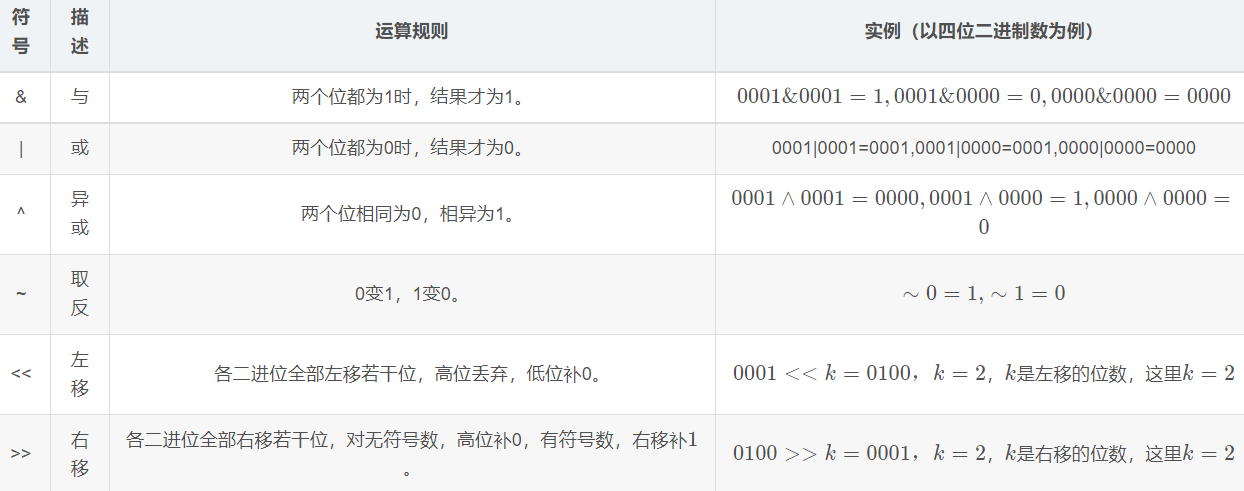

#### 136. 只出现一次的数字
给定一个非空整数数组，除了某个元素只出现一次以外，其余每个元素均出现两次。找出那个只出现了一次的元素。

说明：

你的算法应该具有线性时间复杂度。 你可以不使用额外空间来实现吗

使用异或运算 $\oplus⊕$。异或运算有以下三个性质。

1. 任何数和 00 做异或运算，结果仍然是原来的数，即 $a \oplus 0=aa⊕0=a$。
1. 任何数和其自身做异或运算，结果是 00，即 $a \oplus a=0a⊕a=0$。
1. 异或运算满足交换律和结合律，即$a \oplus b \oplus a=b \oplus a \oplus a=b \oplus (a \oplus a)=b \oplus0=ba⊕b⊕a=b⊕a⊕a=b⊕(a⊕a)=b⊕0=b$。

```go

func singleNumber(nums []int) int {
    single := 0
    for _, num := range nums {
        single ^= num
    }
    return single
}
```


#### 461. 汉明距离
两个整数之间的 汉明距离 指的是这两个数字对应二进制位不同的位置的数目。

给你两个整数 x 和 y，计算并返回它们之间的汉明距离。

思路：x和y进行异或操作，遍历操作后的二进制结果有多少个1

In [16]:
def hammingDistance(x: int, y: int) -> int:
    temp = y^x
    ret = 0
    while(temp):
        ret += temp & 1  # 只将最后一位与1比对，也就是二进制表示下最右边的一位，同样也是十进制转二进制时的余数
        temp = temp >>1
    return ret

In [12]:
hammingDistance(1,4)

2

#### 190. 颠倒二进制位
颠倒给定的 32 位无符号整数的二进制位。返回十进制数。

思路：一开始是放在左边的，现在直接放在右边即可

In [22]:
def reverseBits(n: int) -> int:
    temp = 0
    ret = 0
    num_weishu = 32
    while(n):
        num_weishu -=1
        temp = n&1
        ret = 2**num_weishu+ret if temp ==1 else ret
        n=n>>1
    return ret

In [23]:
reverseBits(964176192)

43261596

#### 342. 4的幂
给定一个整数，写一个函数来判断它是否是 4 的幂次方。如果是，返回 true ；否则，返回 false 。

整数 n 是 4 的幂次方需满足：存在整数 x 使得 n == 4

思路：
1. 是2的次方：只有一个1
2. 是4的次方：1右边有偶数个0

In [41]:
def isPowerOfFour(n: int) -> bool:
    if n ==0:
        return False
    num_one = 0
    num_zero = 0
    while n:
        if n&1:
            num_one+=1
        else:
            num_zero+=1
        n = n>>1
        if num_one > 1:
            return False
    if num_zero/2 == int(num_zero/2):
        return True
    return False

In [40]:
isPowerOfFour(2)

False

#### 318. 最大单词长度乘积
给你一个字符串数组 words ，找出并返回 length(words[i]) * length(words[j]) 的最大值，并且这两个单词不含有公共字母。如果不存在这样的两个单词，返回 0 。

In [19]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [26]:
def maxProduct(words) -> int:
    max_length = 0
    # 遍历到倒数第二个数即可
    for i in range(0,len(words)-1):
        # 使用set的原因是可能自身有重复值
        len_i = len(set(words[i]))
        # 遍历从这个点之后的最大值
        for j in range(i+1,len(words)):
            print(f"{words[i]},{words[j]}")
            len_j = len(set(words[j]))
            # 不含公共字母才计算最大长度
            if len_i +len_j == len(set(words[i]+words[j])):
                max_length = max(max_length,len(words[i])*len(words[j]))
    return max_length

In [27]:
maxProduct(["fcf","ce","cefde","dabae"])

fcf,ce
fcf,cefde
fcf,dabae
ce,cefde
ce,dabae
cefde,dabae


15

#### 338. 比特位计数
给你一个整数 n ，对于 0 <= i <= n 中的每个 i ，计算其二进制表示中 1 的个数 ，返回一个长度为 n + 1 的数组 ans 作为答案。

In [33]:
# 动态规划
def countBits(n: int):
    dp = (n+1)*[0]
    for i in range(1,n+1):
        # 最后一位若是0则与位运算右移一位相同，若是1则是上一个的+1
        dp[i] = dp[i>>1] if i&1==0 else dp[i-1]+1
    return dp
countBits(10)

[0, 1, 1, 2, 1, 2, 2, 3, 1, 2, 2]

In [32]:
5*[0]

[0, 0, 0, 0, 0]

### 二分查找

#### 34. 在排序数组中查找元素的第一个和最后一个位置
给定一个按照升序排列的整数数组 nums，和一个目标值 target。找出给定目标值在数组中的开始位置和结束位置。

如果数组中不存在目标值 target，返回 [-1, -1]

思路：从上下两个区间分别找即可，因为是递增数组所以有第三个条件满足时再判断左边（右）是否也是目标
```go
package main

import (
	"fmt"
)

func main() {
	//fmt.Print(searchRange([]int{5, 7, 7, 8, 8, 10}, 8))
	fmt.Println(findhigh([]int{2, 2}, 2))
}

func searchRange(nums []int, target int) []int {
	if len(nums) == 0 {
		return []int{-1, -1}
	}
	return []int{findlow(nums, target), findhigh(nums, target)}
}

func findlow(nums []int, target int) int {
	l := 0
	r := len(nums) - 1
	for l <= r {
		mid := (l + r) >> 1

		if nums[mid] < target {
			l = mid + 1
		} else if nums[mid] > target {
			r = mid - 1
		} else if mid == 0 || nums[mid-1] != target {
			return mid
		} else {
			r = mid - 1
		}

	}
	return -1
}

func findhigh(nums []int, target int) int {
	l := 0
	r := len(nums) - 1
	for l <= r {
		mid := (l + r) >> 1

		if nums[mid] < target {
			l = mid + 1
		} else if nums[mid] > target {
			r = mid - 1
		} else if mid == len(nums)-1 || nums[mid+1] != target {
			return mid
		} else {
			l = mid + 1
		}

	}
	return -1
}

```

### 动态规划

#### 22. 括号生成

首先写一个栈检查器，然后遍历，若符合则存入该结构，在遍历之前首先检查结构中有无此类结构，若有则删除

In [6]:
def brace_checker(braces):
    num = 0
    for i in braces:
        if i == '(':
            num+=1
        else:
            if num !=0:
                num -=1
            else:
                return '错误'
    if num !=0:
        return '错误'
    return '正确'

In [11]:
brace_checker('()())')

'错误'

从左边添加(，左边的括号一定是(，因此剩下的n-1可以看做p+q=n-1，即'( + p + ) + q'

因此遍历p即可

In [16]:
n=4

total_l = []
total_l.append([None])    # 0组括号时记为None
total_l.append(["()"])    # 1组括号只有一种情况

for i in range(2,n+1):
    # 当前数量的可用括号
    cur_list = []
     # 从0到n-1遍历所有可能的结构，p的个数是j，q的个数是n-1-j
    for j in range(i):  # 能取到i-1
        # 两个循环检查所有p和q
        for p in total_l[j]:
            for q in total_l[i-1-j]:
                if p == None:
                    p = ''
                if q == None:
                    q  = ''
                cur_list.append('('+p+')'+q)
    total_l.append(cur_list)
total_l

[[None],
 ['()'],
 ['()()', '(())'],
 ['()()()', '()(())', '(())()', '(()())', '((()))'],
 ['()()()()',
  '()()(())',
  '()(())()',
  '()(()())',
  '()((()))',
  '(())()()',
  '(())(())',
  '(()())()',
  '((()))()',
  '(()()())',
  '(()(()))',
  '((())())',
  '((()()))',
  '(((())))']]

In [ ]:
class Solution:
    def generateParenthesis(self, n: int) -> List[str]:
        if n == 0:
            return []
        total_l = []
        total_l.append([None])    # 0组括号时记为None
        total_l.append(["()"])    # 1组括号只有一种情况
        for i in range(2,n+1):    # 开始计算i组括号时的括号组合
            l = []        
            for j in range(i):    # 开始遍历 p q ，其中p+q=i-1 , j 作为索引
                now_list1 = total_l[j]    # p = j 时的括号组合情况
                now_list2 = total_l[i-1-j]    # q = (i-1) - j 时的括号组合情况
                for k1 in now_list1:  
                    for k2 in now_list2:
                        if k1 == None:
                            k1 = ""
                        if k2 == None:
                            k2 = ""
                        el = "(" + k1 + ")" + k2
                        l.append(el)    # 把所有可能的情况添加到 l 中
            total_l.append(l)    # l这个list就是i组括号的所有情况，添加到total_l中，继续求解i=i+1的情况
        return total_l[n]

#### 最大递增子序列（不需要连续）

递归方式

In [44]:
nums = [1,5,2,21,4,32,231,12,21,2112]
memo = {}
# 返回nums数组中从i开始最大递增子序列
def max_incre(i,nums):
    if i in memo:
        return memo[i]
    max_len = 1
    # 若只有一个数，则返回1
    if i == len(nums)-1:
        memo[i]=1
        return 1
    for j in range(i,len(nums)):
        if nums[i]<nums[j]:
            max_len = max(max_len,1+max_incre(j,nums))
    memo[i]=max_len
    return max_len
max_incre(0,nums)

6

非递归方式（开销更小）
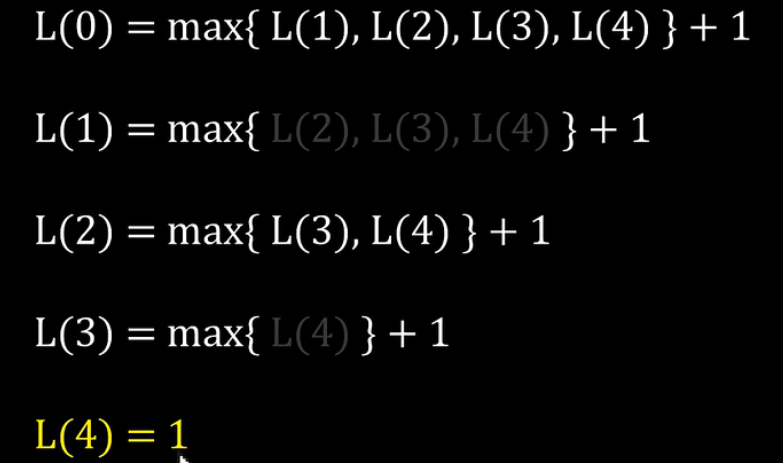

In [49]:
nums = [1,5,2,21,4,32,231,12,21,2112]
# 储存每个位置出发最大的递增子序列长度
L = [1]*len(nums)
# 返回nums数组中从i开始最大递增子序列
def max_incre(nums):
    # 从最右开始计算L(i)=max(L(i+2),L(i+3))+1
    for i in reversed(range(0,len(nums))):
        max_len = 1
        # 循环与之后的数进行对比
        for j in range(i+1,len(nums)):
            if nums[i]<nums[j]:
                max_len = max(max_len,L[j]+1)
        L[i] = max_len
    print(L)
max_incre(nums)

[6, 5, 5, 4, 4, 3, 2, 3, 2, 1]


#### 70. 爬楼梯
假设你正在爬楼梯。需要 n 阶你才能到达楼顶。
每次你可以爬 1 或 2 个台阶。你有多少种不同的方法可以爬到楼顶呢？

直觉思路：下一个阶段与当前阶段可分为1和n-1阶或2和n-2阶，录入之前的有效阶数，循环查找即可

In [21]:
def climb(n):
    mem = [0,1,1]  # 0层无，1层只有一种，2层有两种
    # 遍历mem数组3到n-1的下标
    for i in range(3,n+1):
        num = 0
        # 次数等于两种情况之和，即i-1和i-2时情况之和
        mem.append(mem[i-1]+mem[i-2])
    return mem
climb(10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

#### 118. 杨辉三角
给定一个非负整数 numRows，生成「杨辉三角」的前 numRows 行。

在「杨辉三角」中，每个数是它左上方和右上方的数的和。

直觉思路：当前数组下标的数是上一个数组的下标数+下标数-1

In [19]:
def trian(n):
    mem = [[None],[1]]
    # 从第二行开始遍历
    for i in range(2,n+1):
        temp = []
        # 遍历这一行的中间元素
        for j in range(1,i-1):
            temp.append(mem[i-1][j]+mem[i-1][j-1])
        # 最后添加最左右两边的元素（也就是1）
        temp.append(1)
        temp.insert(0,1)
        mem.append(temp)
    return mem
trian(10)

[[None],
 [1],
 [1, 1],
 [1, 2, 1],
 [1, 3, 3, 1],
 [1, 4, 6, 4, 1],
 [1, 5, 10, 10, 5, 1],
 [1, 6, 15, 20, 15, 6, 1],
 [1, 7, 21, 35, 35, 21, 7, 1],
 [1, 8, 28, 56, 70, 56, 28, 8, 1],
 [1, 9, 36, 84, 126, 126, 84, 36, 9, 1]]

#### 1137. 第 N 个泰波那契数
泰波那契序列 Tn 定义如下： 

T0 = 0, T1 = 1, T2 = 1, 且在 n >= 0 的条件下 Tn+3 = Tn + Tn+1 + Tn+2

给你整数 n，请返回第 n 个泰波那契数 Tn 的值。


In [22]:
def taibo(n):
    mem = [0,1,1]  # 0层无，1层只有一种，2层有两种
    # 遍历mem数组3到n-1的下标
    for i in range(3,n+1):
        num = 0
        # 次数等于两种情况之和，即i-1和i-2时情况之和
        mem.append(mem[i-1]+mem[i-2]+mem[i-3])
    return mem
taibo(10)

[0, 1, 1, 2, 4, 7, 13, 24, 44, 81, 149]

#### 746. 使用最小花费爬楼梯
给你一个整数数组 cost ，其中 cost[i] 是从楼梯第 i 个台阶向上爬需要支付的费用。一旦你支付此费用，即可选择向上爬一个或者两个台阶。

你可以选择从下标为 0 或下标为 1 的台阶开始爬楼梯。

请你计算并返回达到楼梯顶部的最低花费。

直觉思路： 第n步时，只能选择从2+（n-2）和1+（n-1）里选择最小值并保存即可

In [28]:
def climb(cost):
    # 层数
    n = len(cost)
    mem = [0,0]   # 前两层不需要花钱
    # 遍历cost数组2到n-1的下标 
    for i in range(2,n+1):   # 这里n+1是因为要到顶部（最后一级台阶不算顶部）
        num = 0
        # 花费等于之前层跳到当前层花费+到之前层的花费
        mem.append(min(cost[i-1]+mem[i-1],cost[i-2]+mem[i-2]))
    return mem
climb([10,15,20])

[0, 0, 10, 15]

#### !!!53. 最大子数组和

网友答案解析：
+ pre的最大函数隐含了一个规则：若num[i]<=0，则另起炉灶选择num[i]
+ 另一个问题是，若之前的数组比当前的数大，但是这个数以及以后的数加起来更大，会怎样？
+ 表示以 nums[i] 结尾 的 连续 子数组的最大和
+ 解决问题的方法就是遍历所有数结尾的最大和，且在过程中保存最大值

In [2]:
nums = [-2,1,-3,1,-1,2,1,-5,4]
def maxSubArray(nums) -> int:
    size = len(nums)
    pre = 0
    res = nums[0]
    for i in range(size):
        print(f'nums[i]为{nums[i]}，pre为{pre}')
        pre = max(nums[i], pre + nums[i])
        print(f'结果为{pre}')
        res = max(res, pre)
    return res
maxSubArray( [2,1,-1,1,-1,3,1,-5,4])

nums[i]为2，pre为0
结果为2
nums[i]为1，pre为2
结果为3
nums[i]为-1，pre为3
结果为2
nums[i]为1，pre为2
结果为3
nums[i]为-1，pre为3
结果为2
nums[i]为3，pre为2
结果为5
nums[i]为1，pre为5
结果为6
nums[i]为-5，pre为6
结果为1
nums[i]为4，pre为1
结果为5


6

分治法
对于一个区间 [l,r][l,r]，我们可以维护四个量：

$\textit{lSum}$ 表示 [l,r] 内以 l为左端点的最大子段和 <br>
$\textit{rSum}$ 表示 [l,r] 内以 r 为右端点的最大子段和<br>
$\textit{mSum}$ 表示 [l,r]内的最大子段和<br>
$\textit{iSum}$ 表示 [l,r] 的区间和<br>


```javascript
function Status(l, r, m, i) {
    this.lSum = l;
    this.rSum = r;
    this.mSum = m;
    this.iSum = i;
}

const pushUp = (l, r) => {
    const iSum = l.iSum + r.iSum;      //区间和等于两个区间相加
    const lSum = Math.max(l.lSum, l.iSum + r.lSum);      //最大字段和因为是从左开始的，因此求最大即可
    const rSum = Math.max(r.rSum, r.iSum + l.rSum);
    //最大字段和要么是左，右，要么是左右中间（即左区间的右端点最大和+左...右端点最大和）
    const mSum = Math.max(Math.max(l.mSum, r.mSum), l.rSum + r.lSum);
    return new Status(lSum, rSum, mSum, iSum);
}

const getInfo = (a, l, r) => {
    if (l === r) {   //若区间只有一个点，则返回这个点
        return new Status(a[l], a[l], a[l], a[l]);
    }
    const m = (l + r) >> 1;
    const lSub = getInfo(a, l, m);
    const rSub = getInfo(a, m + 1, r);
    return pushUp(lSub, rSub);
}

var maxSubArray = function(nums) {
    return getInfo(nums, 0, nums.length - 1).mSum;
};


```

#### 121. 买卖股票的最佳时机
给定一个数组 prices ，它的第 i 个元素 prices[i] 表示一支给定股票第 i 天的价格。

你只能选择 某一天 买入这只股票，并选择在 未来的某一个不同的日子 卖出该股票。设计一个算法来计算你所能获取的最大利润。

返回你可以从这笔交易中获取的最大利润。如果你不能获取任何利润，返回 0 。



思路：从右往左遍历，每一遍历放入买入价格，在下一次遍历时计算最大卖出值  
**超出时间限制**

In [10]:
def stock(prices):
    profits = [0]*len(prices)
    for i in range(1,len(prices)):
        # 计算当天卖出的价格
        for j in range(0,i):
            profits[j] = max(profits[j],prices[i]-prices[j])
    print(profits)
stock([7,1,5,3,6,4])

[0, 5, 1, 3, 0, 0]


**超出时间限制**思路：已遍历的买入值肯定只会取最小值，用这个值跟当前值相减

In [12]:
def stock(prices):
    profits = 0
    min_buy = prices[0]
    for i in range(1,len(prices)):
        # 计算当天卖出的价格
        profits = max(profits,prices[i]-min_buy)
        # 检查是不是最小值
        min_buy = min(min_buy,prices[i])
    print(profits)
stock([7,1,5,3,6,4])

5


#### ！（不想做）338. 比特位计数
给你一个整数 n ，对于 0 <= i <= n 中的每个 i ，计算其二进制表示中 1 的个数 ，返回一个长度为 n + 1 的数组 ans 作为答案。

思路：首先转为二进制看有多少位，通过规律生成

#### 392. 判断子序列
给定字符串 s 和 t ，判断 s 是否为 t 的子序列。

字符串的一个子序列是原始字符串删除一些（也可以不删除）字符而不改变剩余字符相对位置形成的新字符串。（例如，"ace"是"abcde"的一个子序列，而"aec"不是）。

进阶：

如果有大量输入的 S，称作 S1, S2, ... , Sk 其中 k >= 10亿，你需要依次检查它们是否为 T 的子序列。在这种情况下，你会怎样改变代码？


从前往后扫，若找到字符，则计录，找下一个字符

In [30]:
s = "abc"
t = "ahbgdc"
def isSubsequence(s: str, t: str) -> bool:
    if len(s)==0:
        return True
    re = False
    index = 0
    for i in t:
        if i == s[index]:
            index+=1
        print(index)
        if index == len(s):
            re = True
            break
    return re
isSubsequence(s,t)

1
1
2
2
2
3


False

#### 1646. 获取生成数组中的最大值
给你一个整数 n 。按下述规则生成一个长度为 n + 1 的数组 nums ：

nums[0] = 0<br>
nums[1] = 1<br>
当 2 <= 2 * i <= n 时，nums[2 * i] = nums[i]<br>
当 2 <= 2 * i + 1 <= n 时，nums[2 * i + 1] = nums[i] + nums[i + 1]<br>
返回生成数组 nums 中的 最大 值。<br>

In [53]:
def getMaximumGenerated(n: int) -> int:
    if n == 0:
        return 0
    nums = [0,1]
    n = n+1
    for i in range(1,int(n/2)):
        nums.append(nums[i])
        nums.append(nums[i]+nums[i+1])
    # 判断是不是偶数，若是则最后再加一次和
    if n%2!=0:
        nums.append(nums[int(n/2)])
    return nums
getMaximumGenerated(0)

[0, 1, 0]

In [40]:
int(11/2)

5

#### 1025. 除数博弈
爱丽丝和鲍勃一起玩游戏，他们轮流行动。爱丽丝先手开局。

最初，黑板上有一个数字 n 。在每个玩家的回合，玩家需要执行以下操作：

选出任一 x，满足 0 < x < n 且 n % x == 0 。
用 n - x 替换黑板上的数字 n 。
如果玩家无法执行这些操作，就会输掉游戏。

只有在爱丽丝在游戏中取得胜利时才返回 true 。假设两个玩家都以最佳状态参与游戏。



思路：从0开始计算无法操作的数并存入，

#### 5. 最长回文子串
给你一个字符串 s，找到 s 中最长的回文子串。
输入：s = "babad"
输出："bab"

思路：若一个字符串是回文数，那么他去除左右两边的子串也是回文数，由此遍历所有子串即可

状态转移方程$P(i,j)=P(i+1,j−1)∧(S i
​
 ==S 
j
​
 )$
 
 边界条件：
 1. 若为单个字符则是
 2. 若为两个字符且左右相等也是
 3. 左边界r不能大于等于右边界

In [33]:
def longestPalindrome(s):
    n = len(s)
    max_len = 1
    begin = 0
    # 生成一个n*n的数组存放是否为回文串
    is_huiwen = [[False]*n for i in range(n)]
    # 对角线为True
    for i in range(0,n):
        is_huiwen[i][i] = True
    # 从短长度逐渐增加遍历（2到n）
    for L in range(2,n+1):
        # 左边界：从0到n-L
        # 比如n=4，L为2，则从0到2
        for left in range(0,n-L+1):
            # 右边界r即为 left+L-1
            right = left+L-1
            # 首先判断左右两边是否相等
            if s[right] != s[left]:
                is_huiwen[left][right] = False
            # 判断是否只有两个数，若是则不需要进一步判断子串
            elif right-left==2:
                is_huiwen[left][right] = True
            else:
                is_huiwen[left][right] = is_huiwen[left+1][right-1]
            print(left,right)
            if is_huiwen[left][right] and right-left+1>max_len:
                begin = left
                max_len = right-left+1
    print(is_huiwen)
    return s[begin:begin+max_len]
longestPalindrome("cbba")

0 1
1 2
2 3
0 2
1 3
0 3
[[True, False, False, False], [False, True, False, False], [False, False, True, False], [False, False, False, True]]


'c'

In [44]:
def longestPalindrome(s: str) -> str:
    n = len(s)
    max_len = 1
    begin = 0
    # 生成一个n*n的数组存放是否为回文串
    is_huiwen = [[False]*n for i in range(n)]
    # 对角线为True
    for i in range(0,n):
        is_huiwen[i][i] = True
    # 从短长度逐渐增加遍历（2到n）
    for L in range(2,n+1):
        # 左边界：从0到n-L
        # 比如n=4，L为2，则从0到2
        for left in range(0,n-L+1):
            # 右边界r即为 left+L-1
            right = left+L-1
            # 首先判断左右两边是否相等
            if s[right] != s[left]:
                is_huiwen[left][right] = False
            # 判断是否只有两个数，若是则不需要进一步判断子串
            elif right-left==1:
                is_huiwen[left][right] = True
            else:
                is_huiwen[left][right] = is_huiwen[left+1][right-1]
            if is_huiwen[left][right]==True and right-left+1>max_len:
                begin = left
                max_len = right-left+1
    return s[begin:begin+max_len]
longestPalindrome("a")

'a'

#### 55. 跳跃游戏
给定一个非负整数数组 nums ，你最初位于数组的 第一个下标 。

数组中的每个元素代表你在该位置可以跳跃的最大长度。

判断你是否能够到达最后一个下标。

输入：nums = [2,3,1,1,4]
输出：true
解释：可以先跳 1 步，从下标 0 到达下标 1, 然后再从下标 1 跳 3 步到达最后一个下标。

**思路**：从左到右遍历，维护一个n的数组，将是否能调到第i个数存入数组即可

**超出时间限制**

In [51]:
def canJump(nums) -> bool:
    # 初始位于第一个下标
    ret = [True]+[False]*(len(nums)-1)
    # 从第一个开始遍历
    for i in range(len(nums)):
        # 判断该点能不能走到，如果走不到则跳过
        if ret[i]==False:
            continue
        # 写入能走到的点
        for step in range(1,nums[i]+1):
            if i+step<len(nums):
                ret[i+step] = True
    print(ret)
canJump([3,2,1,0,4] )

[True, True, True, True, False]


修改：维护可以达到的最远位置即可（一个点若能到达当前点，那么之前的点也一定能到达）

In [ ]:
def canJump(nums) -> bool:
    # 初始位于第一个下标
    ret = [True]+[False]*(len(nums)-1)
    # 从第一个开始遍历
    for i in range(len(nums)):
        # 判断该点能不能走到，如果走不到则跳过
        if ret[i]==False:
            continue
        # 写入能走到的点
        for step in range(1,nums[i]+1):
            if i+step<len(nums):
                ret[i+step] = True
    print(ret)
canJump([3,2,1,0,4] )

#### 62. 不同路径
一个机器人位于一个 m x n 网格的左上角 （起始点在下图中标记为 “Start” ）。

机器人每次只能向下或者向右移动一步。机器人试图达到网格的右下角（在下图中标记为 “Finish” ）。

问总共有多少条不同的路径？

思路：一个点只有从他的上方和左方能出发到达，因此到这个点的路径数等于前两个点的路径数之和

维护每个点的路径数，从行-列开始遍历

In [6]:
def uniquePaths(m: int, n: int) -> int:
    routes = [[0]*n for i in range(m)]
    # 第一个点初始化为1
    routes[0][0] = 1
    for row in range(m):
        for col in range(n):
            # 不能超出边界，
            if row-1>=0 and col-1>=0:
                routes[row][col] = routes[row-1][col] + routes[row][col-1]
            elif row-1>=0 and col-1<0:
                routes[row][col] = routes[row-1][col]
            elif row-1<0 and col-1>=0:
                routes[row][col] = routes[row][col-1]
    print(routes[-1][-1])
uniquePaths(m = 3, n = 3)

6


**Go版本**
```go
package main

func uniquePaths(m int, n int) int {
	//初始化m*n的数组的一行
	dp := make([][]int, m)
	//为每行填入列
	for i := 0; i < m; i++ {
		dp[i] = make([]int, n)
	}
	//初始化数据，第一行都只有一种走法
	for i := 0; i < n; i++ {
		dp[0][i] = 1
	}
	//初始化数据，第一列都只有一种走法
	for i := 0; i < m; i++ {
		dp[i][0] = 1
	}
	//开始遍历，从第二行开始第二列
	for i := 1; i < m; i++ {
		for j := 1; j < n; j++ {
			dp[i][j] = dp[i-1][j] + dp[i][j-1]
		}
	}
	return dp[m][n]
}
func main() {
	uniquePaths(3, 7)
}
```

#### 63. 不同路径 II
一个机器人位于一个 m x n 网格的左上角 （起始点在下图中标记为 “Start” ）。

机器人每次只能向下或者向右移动一步。机器人试图达到网格的右下角（在下图中标记为 “Finish”）。

现在考虑网格中有障碍物。那么从左上角到右下角将会有多少条不同的路径？

网格中的障碍物和空位置分别用 1 和 0 来表示。
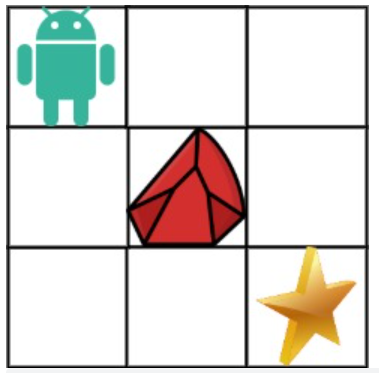

思路：同上面类似，有两点不同：
1. 列和行初始化如果有1则之后均为0
2. 在遍历过程中若有1则直接设置为0

```go
package main

import "fmt"

func uniquePathsWithObstacles(obstacleGrid [][]int) int {
	//if obstacleGrid[0][0] == 1 {
	//	return 0
	//}
	m := len(obstacleGrid)
	n := len(obstacleGrid[0])
	//初始化m*n的数组的一行
	dp := make([][]int, m)
	//为每行填入列
	for i := 0; i < m; i++ {
		dp[i] = make([]int, n)
	}
	//初始化数据，第一行都只有一种走法，若有1则之后均为0
	for i := 0; i < n; i++ {
		if obstacleGrid[0][i] == 1 {

			for j := i; j < n; j++ {
				dp[0][j] = 0
			}
			break
		}
		dp[0][i] = 1
	}
	//初始化数据，第一列都只有一种走法，若有1则退出
	for i := 0; i < m; i++ {
		if obstacleGrid[i][0] == 1 {
			for j := i; j < m; j++ {
				dp[j][0] = 0
			}
			break
		}
		dp[i][0] = 1
	}
	//开始遍历，从第二行开始第二列若有1则直接赋值为0
	for i := 1; i < m; i++ {
		for j := 1; j < n; j++ {
			if obstacleGrid[i][j] == 1 {
				dp[i][j] = 0
				continue
			}
			dp[i][j] = dp[i-1][j] + dp[i][j-1]
		}
	}
	return dp[m-1][n-1]
}
func main() {
	fmt.Println(uniquePathsWithObstacles([][]int{{0, 0}, {1, 1}, {0, 0}}))
}

```

#### 45. 跳跃游戏 II
给你一个非负整数数组 nums ，你最初位于数组的第一个位置。

数组中的每个元素代表你在该位置可以跳跃的最大长度。

你的目标是使用最少的跳跃次数到达数组的最后一个位置。

假设你总是可以到达数组的最后一个位置。

思路：
1. 维护一个数组存放每个点的最少次数
2. 一个位置的最少次数等于之前点的次数+1的最小值

In [32]:
def jump(nums) -> int:
    dp = [0]+[None]*(len(nums)-1)
    # 遍历每个数
    for i in range(0,len(nums)):
        # 遍历每个步长
        for j in range(1,nums[i]+1):
#             print(i,j,dp)
            # 不能越过左边界
            if i+j > len(nums)-1:
                break
            if dp[i+j]!=None:
                dp[i+j] = min(dp[i+j],dp[i]+1)
            else:
                dp[i+j] = dp[i]+1
    print(dp)
jump([1,2,1,1]) 

[0, 1, 2, 2]


优化思路：每次在上次能跳到的范围（end）内选择一个能跳的最远的位置（也就是能跳到max_far位置的点）作为下次的起跳点 ！例如：(0,i)最多能跳到j，则下次遍历范围是(i,j)

In [33]:
def jump(nums) -> int:
    n = len(nums)
    # 目前能跳到的最远位置，上次跳跃可达范围右边界（下次的最右起跳点），跳跃次数
    maxPos, end, step = 0, 0, 0  
    for i in range(n - 1):
        if maxPos >= i:
            maxPos = max(maxPos, i + nums[i])
            # 到达上次跳跃能到达的右边界了
            if i == end:
                end = maxPos  # 目前能跳到的最远位置变成了下次起跳位置的右边界
                step += 1
    return step
jump([1,2,1,1]) 

2

#### 64. 最小路径和
给定一个包含非负整数的 m x n 网格 grid ，请找出一条从左上角到右下角的路径，使得路径上的数字总和为最小。

说明：每次只能向下或者向右移动一步。

思路：遍历即可，保存到每个点的最短长度
```go
package main

import (
	"fmt"
	"math"
)

func main() {

	fmt.Print(minPathSum([][]int{{1, 2, 3}, {4, 5, 6}}))

}

func minPathSum(grid [][]int) [][]int {
	m := len(grid)
	n := len(grid[0])
	//生成二维切片
	dp := make([][]int, m)
	for i, _ := range dp {
		dp[i] = make([]int, n)
	}
	dp[0][0] = grid[0][0]
	//对最上和最右生成值（只有一条路）
	for i := 1; i < m; i++ {
		//等于当前值加上个点的值
		dp[i][0] = dp[i-1][0] + grid[i][0]
	}
	for j := 1; j < n; j++ {
		//等于当前值加上个点的值
		dp[0][j] = grid[0][j] + dp[0][j-1]
	}
	//遍历grid，外层为行
	//计算到当前点的最小值（左边或上边最小值加上当前点的值）
	for i := 1; i < m; i++ {
		for j := 1; j < n; j++ {
			dp[i][j] = int(math.Min(float64(dp[i-1][j]), float64(dp[i][j-1]))) + grid[i][j]
		}
	}
	return dp
}

```

#### 97. 交错字符串
给定三个字符串 s1、s2、s3，请你帮忙验证 s3 是否是由 s1 和 s2 交错 组成的。

两个字符串 s 和 t 交错 的定义与过程如下，其中每个字符串都会被分割成若干 非空 子字符串：

s = s1 + s2 + ... + sn
t = t1 + t2 + ... + tm
|n - m| <= 1
交错 是 s1 + t1 + s2 + t2 + s3 + t3 + ... 或者 t1 + s1 + t2 + s2 + t3 + s3 + ...
注意：a + b 意味着字符串 a 和 b 连接。


思路：$f(i,j)=[f(i−1,j)ands 
1
​
 (i−1)=s 
3
​
 (p)]or[f(i,j−1)ands 
2
​
 (j−1)=s 
3
​
 (p)]$

```go
package main

import "fmt"

func main() {
	fmt.Print(isInterleave("aabcc", "dbbca", "aadbbcbcac"))
}

func isInterleave(s1 string, s2 string, s3 string) bool {
	n, m, t := len(s1), len(s2), len(s3)
	//两个长度加起来必须等于s3
	if (n + m) != t {
		return false
	}
	//创建一个m+1*n+1的切片
	f := make([][]bool, n+1)
	for i := 0; i <= n; i++ {
		f[i] = make([]bool, m+1)
	}
	//f[i][j]表示s1的前i个元素和s2的前j个元素与s3的前i+j个元素能否交错构成
	f[0][0] = true
	for i := 0; i <= n; i++ {
		for j := 0; j <= m; j++ {
			p := i + j - 1
			//这里分两边只是为了应对边界条件
			if i > 0 {
				//f[i-1][j]且s1第i个元素与s3[p]相等
				f[i][j] = f[i][j] || (f[i-1][j] && s1[i-1] == s3[p])
			}
			if j > 0 {
				f[i][j] = f[i][j] || (f[i][j-1] && s2[j-1] == s3[p])
			}
		}
	}
	return f[n][m]
}
```

#### 152. 乘积最大子数组
给你一个整数数组 nums ，请你找出数组中乘积最大的非空连续子数组（该子数组中至少包含一个数字），并返回该子数组所对应的乘积。

测试用例的答案是一个 32-位 整数。

子数组 是数组的连续子序列。

思路：以二维数组存储第i位乘到第j位  ***内存不够！***
```go
package main

import (
	"fmt"
)

func main() {
	fmt.Print(maxProduct([]int{2, 3, -2, 4}))
}

func maxProduct(nums []int) int {
	if len(nums) == 1 {
		return nums[0]
	}
	//生成二维切片，表示第i位乘到第j位
	dp := make([][]int, len(nums))
	for i, _ := range dp {
		dp[i] = make([]int, len(nums))
	}
	//初始化
	for i, _ := range dp {
		dp[i][i] = nums[i]
	}
	//边界条件：i<j，i不需要遍历到最后一个（已经初始化）
	for i := 0; i < len(nums)-1; i++ {
		for j := i + 1; j < len(nums); j++ {
			dp[i][j] = dp[i][j-1] * nums[j]
		}
	}
	var ret int = 0
	for _, ls := range dp {
		for _, val := range ls {
			if val > ret {
				ret = val
			}
		}
	}
	return ret
}
```

优化1：
```go
package main

import (
	"fmt"
)

func main() {
	fmt.Print(maxProduct([]int{0, 2}))
}

func maxProduct(nums []int) int {
	if len(nums) == 1 {
		return nums[0]
	}
	var dp int
	var ret int = nums[len(nums)-1]
	//边界条件：i<j，i不需要遍历到最后一个（已经初始化）
	for i := 0; i < len(nums)-1; i++ {
		//初始化dp
		dp = nums[i]
		if dp > ret {
			ret = dp
		}
		for j := i + 1; j < len(nums); j++ {
			//滚动记数即可
			dp = dp * nums[j]
			if dp > ret {
				ret = dp
			}
		}
	}

	return ret
}


```

#### ！！！！！174. 地下城游戏
一些恶魔抓住了公主（P）并将她关在了地下城的右下角。地下城是由 M x N 个房间组成的二维网格。我们英勇的骑士（K）最初被安置在左上角的房间里，他必须穿过地下城并通过对抗恶魔来拯救公主。

骑士的初始健康点数为一个正整数。如果他的健康点数在某一时刻降至 0 或以下，他会立即死亡。

有些房间由恶魔守卫，因此骑士在进入这些房间时会失去健康点数（若房间里的值为负整数，则表示骑士将损失健康点数）；其他房间要么是空的（房间里的值为 0），要么包含增加骑士健康点数的魔法球（若房间里的值为正整数，则表示骑士将增加健康点数）。

为了尽快到达公主，骑士决定每次只向右或向下移动一步。

 

编写一个函数来计算确保骑士能够拯救到公主所需的最低初始健康点数。

思路：
1. 状态转移方程：
为下两个点最低健康点数的小者，减去当前点的值为当前点的最低健康点数，但是不能小于1
$\textit{dp}[i][j] = \max(\min(\textit{dp}[i+1][j], \textit{dp}[i][j + 1]) - \textit{dungeon}(i, j), 1)
$

2. 边界条件为，当 i=n−1 或者 j=m−1 时，$\textit{dp}[i][j]dp[i][j]$ 转移需要用到的 $\textit{dp}[i][j+1]dp[i][j+1]$ 和 $\textit{dp}[i+1][j]dp[i+1][j]$ 中有无效值，因此代码实现中给无效值赋值为极大值。特别地，$\textit{dp}[n-1][m-1]dp[n−1][m−1]$ 转移需要用到的 $\textit{dp}[n-1][m]dp[n−1][m]$ 和 $\textit{dp}[n][m-1]dp[n][m−1]$ 均为无效值，因此给这两个值赋值为 1。

```go
package main

import (
	"fmt"
	"math"
)

func main() {
	//fmt.Print(searchRange([]int{5, 7, 7, 8, 8, 10}, 8))
	fmt.Println(calculateMinimumHP([][]int{{-2, -3, 3}, {-5, -10, 1}}))

}

func calculateMinimumHP(dungeon [][]int) [][]int {
	n, m := len(dungeon), len(dungeon[0])
	dp := make([][]int, n+1)
	for i := 0; i < len(dp); i++ {
		dp[i] = make([]int, m+1)
		for j := 0; j < len(dp[i]); j++ {
			dp[i][j] = math.MaxInt32
		}
	}
	dp[n][m-1], dp[n-1][m] = 1, 1
	for i := n - 1; i >= 0; i-- {
		for j := m - 1; j >= 0; j-- {
			minn := min(dp[i+1][j], dp[i][j+1])
			dp[i][j] = max(minn-dungeon[i][j], 1)
		}
	}
	return dp
}

func min(x, y int) int {
	if x < y {
		return x
	}
	return y
}

func max(x, y int) int {
	if x > y {
		return x
	}
	return y
}
```

### 链表

#### 206. 反转链表
给你单链表的头节点 head ，请你反转链表，并返回反转后的链表。

python：
```python
class Solution:
    def reverseList(self, head: ListNode) -> ListNode:
        if head is None:
            return None
        # 从尾到头加入即可
        ln = ListNode(head.val) # 最后一个的指针是None
        # 遍历到head.next=None即可
        while head.next != None:
            head = head.next
            ln = ListNode(head.val,ln)
        return ln
```

C++:
非递归形式：
```c++
class Solution {
public:
    ListNode* reverseList(ListNode* head) {
        // 非递归
        // 使用prev存储输出列表的头结点
        // 尽量处理当前节点的下一个节点
        ListNode *prev = nullptr,*next;
        // 遍历head链表，知道head.next == nullptr
        while(head!=nullptr){
            // 将head.next值赋给next，修改当前节点的next为prev
            next = head->next;
            head->next = prev;
            // 将当前节点赋值给prev
            prev = head;
            // head指向下一个节点
            head = next;
        }
        return prev;
    }
};
```
递归形式：
```c++
class Solution {
public:
    ListNode* reverseList(ListNode* head,ListNode* prev=nullptr) {
        // 递归
        // 若为空指针，则返回prev
        if(head==nullptr){
            return prev;
        }
        // 最好操作next节点避免内存问题
        ListNode* next = head->next;
        // 修改当前节点的next
        head->next = prev;
        return reverseList(next,head);
    }
};
```

#### 21. 合并两个有序链表
将两个升序链表合并为一个新的 升序 链表并返回。新链表是通过拼接给定的两个链表的所有节点组成的。 

思路：比较两个列表的第一个元素，将大的放入新链表中，知道其中一个链表为空指针，把不为空的链表加到新链表即可

第一次提交
```c++
class Solution {
public:
    ListNode* mergeTwoLists(ListNode* list1, ListNode* list2) {
        // 比较两个列表的第一个元素，将大的放入新链表中，
        // 知道其中一个链表为空指针，把不为空的链表加到新链表即可
        // 非递归
        ListNode* newls=new ListNode(); // 当前位置的指针
        // 保存头部指针
        ListNode* head = newls;

        while(list1!=nullptr||list2!=nullptr){
 
            if(list2==nullptr){
                newls->next=list1;
                break;
            }
            if(list1==nullptr){
                newls->next=list2;
                break;
            }
            // 比较两个值
            if (list1->val <= list2->val){
                newls->next = list1;
                newls = newls->next;
                // 将其转为下一个值
                list1 = list1->next;
            }
            else{
                newls->next = list2;
                newls = newls->next;
                list2 = list2->next;
            }

        }
        return head->next;
    }
};
```

递归形式：
```c++
class Solution {
public:
    ListNode* mergeTwoLists(ListNode* list1, ListNode* list2) {
        // std::cout << list1->val<<" "<<list2->val<<"\n";
        // 递归写法
        if(list2==nullptr){
            return list1;
        }
        if(list1==nullptr){
            return list2;
        }
        ListNode* head = nullptr;
        // 比较大小
        if(list1->val > list2->val){
            head = list2;
            list2=list2->next;
        }
        else{
            head = list1;
            list1=list1->next;
        }
        head->next = mergeTwoLists(list1,list2);
        return head;
}
};
```

#### 24. 两两交换链表中的节点
给你一个链表，两两交换其中相邻的节点，并返回交换后链表的头节点。你必须在不修改节点内部的值的情况下完成本题（即，只能进行节点交换）。

直觉写法
```c++

class Solution {
public:
    ListNode* swapPairs(ListNode* head) {
        if(!head){return nullptr;}
        // 保留头结点的指针，即开头的第二个节点
        ListNode* dummy = head->next;
        if(!dummy){return head;}
        // 一组节点的第二个节点
        ListNode* next;
        ListNode* next_group;
        // 两两进行指针交换，当前节点和下一个节点必需存在
        while (head&&head->next){
            next = head->next;
            next_group = next->next;
            std::cout << head->val <<"+"<<next->val<<"\n";
            // 当前节点的指针指向下一个节点的next的next（若为空则指向next）
            if(next->next&&next->next->next){
                head->next=next->next->next;
            }
            else{
                head->next=next->next;
            }
            // 下一个节点的next指向当前节点
            next->next=head;
            // 当前节点跳到下下个指针
            head = next_group;
        }
        return dummy;
    }
};
```

书上的改进：
```c++
ListNode *swapPairs(ListNode *head) {
    ListNode *p = head, *s;
    if (p && p->next) {
        // 一组的下一个节点
        s = p->next;
        // 第一个节点的下一个换为下一个节点的next
        p->next = s->next;
        // 第二个的next是当前节点
        s->next = p;
        // 指向链表中的第二个节点，用于返回
        head = s;
        while (p->next && p->next->next) {
            s = p->next->next;
            p->next->next = s->next;
            s->next = p->next;
            p->next = s;
            p = s->next;
        }
    }
    return head;
}
```

#### 160. 相交链表
给你两个单链表的头节点 headA 和 headB ，请你找出并返回两个单链表相交的起始节点。如果两个链表不存在相交节点，返回 null 。

```c++
class Solution {
public:
    ListNode *getIntersectionNode(ListNode *headA, ListNode *headB) {
        // 两个链表同时走一步，最终会到相同节点
        if(headA&&headB){
            ListNode *l1=headA, *l2= headB;
            while(l1!=l2){
                // 走一步
                // 若到达最后节点，则转到另一个链表的开始
                if(!l1){    //不能写l1.next，因为可能没有相交点，则两个同时输出空指针
                    l1=headB;
                }
                else{
                    l1=l1->next;
                }
                if(!l2){
                    l2=headA;
                }
                else{
                    l2=l2->next;
                }
            }
            return l2;
        }
        return nullptr;
    }
};
```

#### 234. 回文链表
给你一个单链表的头节点 head ，请你判断该链表是否为回文链表。如果是，返回 true ；否则，返回 false

### 树

#### 104. 二叉树的最大深度
给定一个二叉树，找出其最大深度。

二叉树的深度为根节点到最远叶子节点的最长路径上的节点数。

说明: 叶子节点是指没有子节点的节点。

示例：
给定二叉树 [3,9,20,null,null,15,7]，

```c++
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode() : val(0), left(nullptr), right(nullptr) {}
 *     TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
 *     TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
 * };
 */
class Solution {
public:
    int maxDepth(TreeNode* root) {
        // 遍历到最后一层返回1，其它层将返回值+1
        // 最大深度为左右子树的深度最大值+1
        // 注意这里若为空指针则不在树的结构了，因此为0
        return root?max(maxDepth(root->left),maxDepth(root->right))+1:0;
    }
};
```

#### 110. 平衡二叉树
给定一个二叉树，判断它是否是高度平衡的二叉树。

本题中，一棵高度平衡二叉树定义为：

一个二叉树每个节点 的左右两个子树的高度差的绝对值不超过 1 。

自己的代码：
```c++
class Solution {
public:
    bool isBalanced(TreeNode* root) {
        return checkDepth(root) !=-1;
    }
    // 计算当前节点深度并比较左右子树的深度，若相差大于1则返回-1
    int checkDepth(TreeNode* root){
        // 若为空则返回0
        if(root==nullptr){
            return 0;
        }
        // 初始化两个变量
        int left,right;
        // 递归返回当前节点左右子树的深度，并判断
        left = checkDepth(root->left);
        right = checkDepth(root->right);
        // 不满足则返回-1，避免后续计算
        if(left==-1||right==-1||abs(left-right)>1){
            return -1;
        }
        return max(left,right)+1;
    }
};
```

#### 543. 二叉树的直径
给定一棵二叉树，你需要计算它的直径长度。一棵二叉树的直径长度是任意两个结点路径长度中的最大值。这条路径可能穿过也可能不穿过根结点。

**一个节点直径只能是两个子树深度之和**

```c++
class Solution {
public:
    int diameterOfBinaryTree(TreeNode* root) {
        int diameter=0;
        getMaxDiameterBydepth(root,diameter);
        return diameter;
    }
    int getMaxDiameterBydepth(TreeNode* root,int& diameter) {
        // 后续遍历，返回最大深度并比较左右子树之和是否超过最大值，若超过则更新
        // 判断是否为空指针
        if(!root){
            return 0;
        }
        // 分别计算两个子树的最大深度
        int l = getMaxDiameterBydepth(root->left,diameter);
        int r = getMaxDiameterBydepth(root->right,diameter);
        // 求和并判断
        diameter = max(l+r,diameter);
        // 返回最大深度=子树最大深度+1
        return max(l,r)+1;
    }
};
```

#### 437. 路径总和 III
给定一个二叉树的根节点 root ，和一个整数 targetSum ，求该二叉树里节点值之和等于 targetSum 的 路径 的数目。

路径 不需要从根节点开始，也不需要在叶子节点结束，但是路径方向必须是向下的（只能从父节点到子节点）。

```c++
class Solution {
public:
    // 主函数
    unsigned  long long pathSum(TreeNode* root, int sum) {
        return root? pathSumStartWithRoot(root, sum) +
                    pathSum(root->left, sum) + pathSum(root->right, sum): 0;
    }
    // 辅函数
    unsigned long long pathSumStartWithRoot(TreeNode* root, int sum) {
        if (!root) {
            return 0;
        }
        unsigned long long count = root->val == sum? 1: 0;
        count += pathSumStartWithRoot(root->left, sum - root->val);
        count += pathSumStartWithRoot(root->right, sum - root->val);
        return count;
    }
};
```

#### 101. 对称二叉树
给你一个二叉树的根节点 root ， 检查它是否轴对称。

一开始的错误思路（没有考虑到左右子节点相等）：
```c++
class Solution {
public:
    bool isSymmetric(TreeNode* root) {
        // 满足轴对称的条件：1. 要么没有子树，要么左右节点均存在  2. 左右子树的最大深度相等  3. 左右节点的值相等
        return countDepth(root)!=-1;
    }
    // 若不满足返回-1
    int countDepth(TreeNode* root){
        // 判断当前节点是否为空
        if(!root){
            return 0;
        }
        // 后序遍历
        int left = countDepth(root->left);
        int right = countDepth(root->right);
        // 若左右节点只有一个存在，则返回-1
        if((left==0&&right!=0)||(right==0&&left!=0)){
            return -1;
        }
        // 若left，right为-1或左右节点的最大深度不相等，返回-1
        if(left==-1||right==-1||right!=left){
            return -1;
        }
        // 使用队列来判断两边的值是否相等
        // 返回最大深度
        return 1+max(left,right);
    }
};
```

正确思路：左右两边分开判断值是否相等
```c++
class Solution {
public:
    bool isSymmetric(TreeNode* root) {
        // 满足轴对称的条件：1. 要么没有子树，要么左右节点均存在  2. 左右子树的最大深度相等  3. 左右节点的值相等
        // 若根节点是空则返回true
        return root?isSymmetric(root->right,root->left):true;
    }
    // 若不满足返回-1
    bool isSymmetric(TreeNode* right,TreeNode* left){
        // 两个节点均为空则平衡
        if(!right&&!left){
            return true;
        }
        // 判断左右节点是否存在不平衡
        if((right&&!left)||(left&&!right)){
            return false;
        }
        // 判断值是否相等
        if(right->val!=left->val){
            return false;
        }

        return isSymmetric(right->right,left->left)&&isSymmetric(right->left,left->right);
    }
};
```

#### 1110. 删点成林
给出二叉树的根节点 root，树上每个节点都有一个不同的值。

如果节点值在 to_delete 中出现，我们就把该节点从树上删去，最后得到一个森林（一些不相交的树构成的集合）。

自己写的：
问题在于把要删除的节点指针设置为nullptr似乎不管用
```c++
class Solution {
public:
    vector<TreeNode*> delNodes(TreeNode* root, vector<int>& to_delete) {
        // 若待删除的节点为叶子节点且父节点存在，则不需要关注
        // 若待删除的节点为父节点，则其子节点成为子树的根节点(子节点不能被删除)

        // 转为哈希表便于查找
        std::unordered_set<int> dict(to_delete.begin(),to_delete.end());
        // 一个存储根节点的数组
        std::vector<TreeNode*> ret;
        // 根节点若不被删除，则加入数组
        if(!dict.count(root->val)){
            ret.push_back(root);
        }
        else{
            checkNodeIfDel(root->left,dict,ret);
            checkNodeIfDel(root->right,dict,ret);
            *root =  NULL;  
        }
        // 检查根节点左右子节点
        checkNode(root->left,dict,ret);
        checkNode(root->right,dict,ret);
        return ret;
    }
    void checkNode(TreeNode* node,std::unordered_set<int>& dict,std::vector<TreeNode*>& ret){
        // 判断节点是否为空
        if(!node){
            return;
        }
        // 若当前节点将被删除，首先将赋值为空指针，然后递归查询其子节点
        if(dict.count(node->val)){
            checkNodeIfDel(node->left,dict,ret);
            checkNodeIfDel(node->right,dict,ret);
            *node =  NULL;  
        }
        else{
            // 若不被删除，继续检查子节点
            checkNode(node->left,dict,ret);
            checkNode(node->right,dict,ret);
        }
    }
    // 若父节点被删除的函数
    void checkNodeIfDel(TreeNode* node,std::unordered_set<int>& dict,std::vector<TreeNode*>& ret){
        // 判断节点是否为空
        if(!node){
            return;
        }
        // 若当前节点将被删除，则递归查询其子节点
        if(dict.count(node->val)){
            checkNodeIfDel(node->left,dict,ret);
            checkNodeIfDel(node->right,dict,ret);
            *node =  NULL;  
        }
        // 若不被删除则将其加入数组
        else{
            ret.push_back(node);
        }
    }
};
```

解决方法：添加父节点，判断是左右哪个节点，从父节点删除
```c++
class Solution {
public:
    vector<TreeNode*> delNodes(TreeNode* root, vector<int>& to_delete) {
        // 若待删除的节点为叶子节点且父节点存在，则不需要关注
        // 若待删除的节点为父节点，则其子节点成为子树的根节点(子节点不能被删除)

        // 转为哈希表便于查找
        std::unordered_set<int> dict(to_delete.begin(),to_delete.end());
        // 一个存储根节点的数组
        std::vector<TreeNode*> ret;
        // 根节点若不被删除，则加入数组
        if(!dict.count(root->val)){
            ret.push_back(root);
        }
        else{
            checkNodeIfDel(root,root->left,dict,ret);
            checkNodeIfDel(root,root->right,dict,ret);
            // 根节点不需要删除
        }
        // 检查根节点左右子节点
        checkNode(root,root->left,dict,ret);
        checkNode(root,root->right,dict,ret);
        return ret;
    }
    void checkNode(TreeNode* fathernode, TreeNode* node,std::unordered_set<int>& dict,std::vector<TreeNode*>& ret){
        // 判断节点是否为空
        if(!node){
            return;
        }
        // 若当前节点将被删除，首先将赋值为空指针，然后递归查询其子节点
        if(dict.count(node->val)){
            checkNodeIfDel(node,node->left,dict,ret);
            checkNodeIfDel(node,node->right,dict,ret);
            // 判断左右节点后删除
            if(fathernode->left==node){
                fathernode->left=nullptr;
            }
            else{
                fathernode->right=nullptr;
            }
        }
        else{
            // 若不被删除，继续检查子节点
            checkNode(node,node->left,dict,ret);
            checkNode(node,node->right,dict,ret);
        }
    }
    // 若父节点被删除的函数
    void checkNodeIfDel(TreeNode* fathernode,TreeNode* node,std::unordered_set<int>& dict,std::vector<TreeNode*>& ret){
        // 判断节点是否为空
        if(!node){
            return;
        }
        // 若当前节点将被删除，则递归查询其子节点
        if(dict.count(node->val)){
            checkNodeIfDel(node,node->left,dict,ret);
            checkNodeIfDel(node,node->right,dict,ret);
            // 判断左右节点后删除
            if(fathernode->left==node){
                fathernode->left=nullptr;
            }
            else{
                fathernode->right=nullptr;
            }
        }
        // 若不被删除则将其加入数组
        else{
            ret.push_back(node);
            // 继续检查子节点
            checkNode(node,node->left,dict,ret);
            checkNode(node,node->right,dict,ret);
        }
    }
};
```

#### 637. 二叉树的层平均值
给定一个非空二叉树的根节点 root , 以数组的形式返回每一层节点的平均值。

直觉思路
```c++
class Solution {
public:
    vector<double> averageOfLevels(TreeNode* root) {
        std::vector<double> ret;
        std::vector<TreeNode*> nodes = {root};
        helper(nodes,ret);
        return ret;
    }
    void helper(std::vector<TreeNode*> nodes,std::vector<double>& ret){
        // 若为空则结束
        if(nodes.size()==0){
            return;
        }
        double avg_val=0;
        std::vector<TreeNode*> next_nodes;
        // 层次遍历
        for(auto node:nodes){
            // 计算平均值
            avg_val += node->val;
            // 若存在节点，则将其加入下一次遍历的列表中
            if(node->left){
                next_nodes.push_back(node->left);
            }
            if(node->right){
                next_nodes.push_back(node->right);
            }
        }
        ret.push_back(avg_val/nodes.size());
        // 执行下一层的遍历
        helper(next_nodes,ret);
    }
};
```

使用队列进行层次遍历：
```c++
class Solution {
public:
    vector<double> averageOfLevels(TreeNode* root) {
        std::vector<double> ret;
        std::queue<TreeNode*> q;
        q.push(root);
        while(!q.empty()){
            double sum=0;
            int size = q.size();
            // 遍历求平均值，删除当前节点后加入新的节点
            for(int i=0;i<size;i++){
                TreeNode* node = q.front();
                sum+=node->val;
                q.pop();
                if(node->left){
                    q.push(node->left);
                }
                if(node->right){
                    q.push(node->right);
                }
            }
            ret.push_back(sum/size);
        }
        return ret;
    }
};
```

#### ！！！105. 从前序与中序遍历序列构造二叉树
给定两个整数数组 preorder 和 inorder ，其中 preorder 是二叉树的先序遍历， inorder 是同一棵树的中序遍历，请构造二叉树并返回其根节点。

**思路**：
1. 首先确定左子树在两个遍历数组的位置：首先在前序遍历中找到根节点，然后在中序找到根节点位置，根节点位置的左边即为左子树位置。
2. 根据中序中确定的左子树确定左子树节点数，根据左子树节点数确定前序遍历中右子树起始位置。
3. 前序中根节点右边第一个即为左子树起始位置。
3. 将左右右子树起始位置作为根节点遍历。

书上的题解：
```c++
class Solution {
public:
    // 主函数
    TreeNode *buildTree(vector<int> &preorder, vector<int> &inorder) {
        if (preorder.empty()) {
            return nullptr;
        }
        // 将中序遍历列表改为哈希表便于查找
        unordered_map<int, int> hash;
        for (int i = 0; i < preorder.size(); ++i) {
            hash[inorder[i]] = i;
        }
        return buildTreeHelper(hash, preorder, 0, preorder.size() - 1, 0);
    }

    // 辅函数
    TreeNode *buildTreeHelper(unordered_map<int, int> &hash, vector<int> &preorder, int s0, int e0, int s1) {
        if (s0 > e0) {
            return nullptr;
        }
        // s1是当前根节点索引，mid是根节点值，leftLen表示左子树的子节点数
        // s0表示当前根节点在中序遍历列表中的索引
        // e0表示当前子树在中序遍历中的开始位置
        int mid = preorder[s1], index = hash[mid], leftLen = index - s0 - 1;
        TreeNode *node = new TreeNode(mid);
        node->left = buildTreeHelper(hash, preorder, s0, index - 1, s1 + 1);
        node->right = buildTreeHelper(hash, preorder, index + 1, e0, s1 + 2 +leftLen);
        return node;
    }
};
```

#### 144. 二叉树的前序遍历
给你二叉树的根节点 root ，返回它节点值的 前序 遍历。

使用递归
```c++
class Solution {
public:
    vector<int> preorderTraversal(TreeNode* root) {
        vector<int> ls;
        helper(root,ls);
        return ls;
    }
    void helper(TreeNode* node,vector<int>& ls){
        // 前序遍历，先放入子节点然后遍历左右节点
        if(!node){
            return;
        }
        ls.push_back(node->val);
        helper(node->left,ls);
        helper(node->right,ls);
    }
};
```
不使用递归
```c++
class Solution {
public:
    vector<int> preorderTraversal(TreeNode* root) {
        vector<int> ls;
        // 使用栈进行前序遍历
        stack<TreeNode*> ts;
        if(root){
            ts.push(root);
        }

        // 当栈不为空时调用
        while(!ts.empty()){
            TreeNode* node = ts.top();
            ts.pop();
            // 将根节点值加入列表并将左右节点入栈
            ls.push_back(node->val);
            if(node->right){
                ts.push(node->right);       
            }
            if(node->left){
                ts.push(node->left);       
            }
        }
        return ls;
    }

};
```

#### 99. 恢复二叉搜索树
给你二叉搜索树的根节点 root ，该树中的 恰好 两个节点的值被错误地交换。请在不改变其结构的情况下，恢复这棵树 。

自己写的
```c++
class Solution {
public:
    void recoverTree(TreeNode* root) {
        // 使用中序遍历，若只有一对相邻节点出错，则交换即可
        // 若有四个节点出错，则按遍历顺序排序，原本应该是从小到大，分两种情况，最大值在最右边（最小值在最左边）和中间两个值需要相互交换的情况
        vector<TreeNode*> ls;
        TreeNode* prev=nullptr;
        // 使用prev记录前一个节点以进行比较
        helper(root,ls,prev);
        for(auto el:ls){
            cout<<el->val;
        }
        // 检查长度
        if(ls.size()==4){
            TreeNode* t = findMax(ls);
            if(ls[3]!=t){
                int temp = ls[3]->val;
                ls[3]->val = t->val;
                t->val = temp;
            }
            
            else if(ls[0]!=findMin(ls)){
                t = findMin(ls);
                int temp = ls[0]->val;
                ls[0]->val = t->val;
                t->val = temp;
            }
            else{
                // 交换中间两个节点
                int temp = ls[1]->val;
                ls[1]->val = ls[2]->val;
                ls[2]->val = temp;
            }
        }
        else{
            // 交换中间两个节点
            int temp = ls[0]->val;
            ls[0]->val = ls[1]->val;
            ls[1]->val = temp;
        }
    }
    TreeNode* findMax(vector<TreeNode*>& ls){
        TreeNode* temp=nullptr;
        for(auto el:ls){
            if(!temp||temp->val<el->val){
                temp=el;
            }
        }
        return temp;
    }
    TreeNode* findMin(vector<TreeNode*>& ls){
        TreeNode* temp=nullptr;
        for(auto el:ls){
            if(!temp||temp->val>=el->val){
                temp=el;
            }
        }
        return temp;
    }

    void helper(TreeNode* node,vector<TreeNode*>& ls,TreeNode*& prev){
        if(!node){
            return;
        }
        
        // 先检查左节点
        helper(node->left,ls,prev);
        // 检查当前节点与上一个节点的值大小，若不同则将其加入列表
        if(prev&&prev->val>=node->val){
            ls.push_back(prev);
            ls.push_back(node);
        }
        // 检查完当前节点后将其设为prev
        prev = node;

        helper(node->right,ls,prev);
    }
};
```

#### !!!!669. 修剪二叉搜索树
给你二叉搜索树的根节点 root ，同时给定最小边界low 和最大边界 high。通过修剪二叉搜索树，使得所有节点的值在[low, high]中。修剪树 不应该 改变保留在树中的元素的相对结构 (即，如果没有被移除，原有的父代子代关系都应当保留)。 可以证明，存在 唯一的答案 。

所以结果应当返回修剪好的二叉搜索树的新的根节点。注意，根节点可能会根据给定的边界发生改变。

```c++
class Solution {
public:
    TreeNode *trimBST(TreeNode *root, int L, int R) {
        // 小于阈值：若某节点值小于阈值，则将此节点及其左子树删掉，将其右子树的节点拼接到其父节点上去，大于同理
        // 首先找到在范围内的根节点，若不满足则取其左右子树根节点
        if (!root) {
            return root;
        }
        if (root->val > R) {
            return trimBST(root->left, L, R);
        }
        if (root->val < L) {
            return trimBST(root->right, L, R);
        }
        root->left = trimBST(root->left, L, R);
        root->right = trimBST(root->right, L, R);
        return root;
    }
};
```

#### !!!208. 实现 Trie (前缀树)
Trie（发音类似 "try"）或者说 前缀树 是一种树形数据结构，用于高效地存储和检索字符串数据集中的键。这一数据结构有相当多的应用情景，例如自动补完和拼写检查。

请你实现 Trie 类：

1. Trie() 初始化前缀树对象。
2. void insert(String word) 向前缀树中插入字符串 word 。
3. boolean search(String word) 如果字符串 word 在前缀树中，返回 true（即，在检索之前已经插入）；否则，返回 false 。
4. boolean startsWith(String prefix) 如果之前已经插入的字符串 word 的前缀之一为 prefix ，返回 true ；否则，返回 false 。

根据书上所写：
```c++
class TrieNode{
    public:
        bool isVal;
        TrieNode* childNode[26];
        TrieNode():isVal{false}{
            for(int i=0;i<26;i++){
                childNode[i] = nullptr;
            }
        }
};

class Trie {
public:
    TrieNode* root;
    Trie(): root(new TrieNode()) {}
    void insert(string word) {
        TrieNode* node = root;
        // 循环查看当前节点是否有，若无则创建一个子节点
        for(int i =0;i<word.size();i++){
            if(!node->childNode[word[i]-'a']){
                node->childNode[word[i]-'a'] = new TrieNode();
            }
            node = node->childNode[word[i]-'a'];
        }
        node->isVal = true;
    }
    
    bool search(string word) {
        TrieNode* node = root;
        // 循环检查
        for(int i =0;i<word.size();i++){
            if(!node->childNode[word[i]-'a']){
                return false;
            }
            else{
                node = node->childNode[word[i]-'a'];
            }
        }
        // 根据最后一个节点的isval判断是否有该字符串
        if(!node->isVal){
            return false;
        }
        return true;
    }
    
    bool startsWith(string word) {
        TrieNode* node = root;
        // 循环检查
        for(int i =0;i<word.size();i++){
            if(!node->childNode[word[i]-'a']){
                return false;
            }
            else{
                node = node->childNode[word[i]-'a'];
            }
        }
        return true;
    }
};
```

### 图

#### 785. 判断二分图
存在一个 无向图 ，图中有 n 个节点。其中每个节点都有一个介于 0 到 n - 1 之间的唯一编号。给你一个二维数组 graph ，其中 graph[u] 是一个节点数组，由节点 u 的邻接节点组成。形式上，对于 graph[u] 中的每个 v ，都存在一条位于节点 u 和节点 v 之间的无向边。该无向图同时具有以下属性：
不存在自环（graph[u] 不包含 u）。
不存在平行边（graph[u] 不包含重复值）。
如果 v 在 graph[u] 内，那么 u 也应该在 graph[v] 内（该图是无向图）
这个图可能不是连通图，也就是说两个节点 u 和 v 之间可能不存在一条连通彼此的路径。
二分图 定义：如果能将一个图的节点集合分割成两个独立的子集 A 和 B ，并使图中的每一条边的两个节点一个来自 A 集合，一个来自 B 集合，就将这个图称为 二分图 。

如果图是二分图，返回 true ；否则，返回 false 。
> 直觉做法
```c++
class Solution {
public:
    bool isBipartite(vector<vector<int>>& graph) {
        // 广度优先遍历，对当前节点的相邻节点赋予和当前节点的邻接点不同的颜色，若邻接点有颜色且与当前点一样，则直接返回
        // 记录每个节点颜色值的map，无颜色0，颜色有1和2两种
        map<int,int> m;
        map<int,int> colors={{1,2},{2,1}};
        queue<int> q;
        // 记录第一个节点的颜色，并将其放入队列
        m[0]=1;
        q.push(0);
        // 必须要每个节点均染上色才能结束循环
        int s = graph.size();
        // 循环遍历
        while(!q.empty()||m.size()!=s){
            int code =0;
            // 若q为空，则遍历找到第一个未染色的节点，以此为code
            if(q.empty()){
                for(int i=0;i<s;i++){
                    auto re = m.find(i);
                    if (re != m.end()){
                        continue;
                    }
                    else{
                        code = i;
                        // 当前点没有颜色，需要赋值
                        m[code] = 1;
                        break;
                    }
                }
            }
            else{
                code = q.front();
                q.pop();        
            }
            vector<int> neibor = graph[code];
            // 查看当前颜色并找到需要赋值的颜色
            int color = colors[m[code]];
            // 若没有邻居点，则上色并中断
            if(neibor.empty()){
                m[code]=1;
                continue;
            }
            // 比对邻居点的颜色，若无则赋值
            for(auto el:neibor){
                auto re = m.find(el);
                if (re != m.end()){
                    if(re->second==m[code]){
                        return false;
                    }  
                }
                else{
                    m[el] = color;
                    // 将未染色邻居点置入队列
                    q.push(el);
                }
            }
        }
        return true;
    }
};

```

按书上代码所写的：
```c++
class Solution {
public:
    bool isBipartite(vector<vector<int>>& graph) {
        // 广度优先遍历，对当前节点的相邻节点赋予和当前节点的邻接点不同的颜色，若邻接点有颜色且与当前点一样，则直接返回
        // 记录每个节点颜色值的map，无颜色0，颜色有1和2两种
        // 只将未染色的节点纳入队列检查，因为染色之后可能与邻居点发生冲突
        vector<int> colors(graph.size(),0);
        queue<int> q;
        if(graph.size()==0){
            return true;
        }
        // 循环遍历每个节点以确保孤立节点被访问到
        for(int i=0;i<graph.size();i++){
            // 检查当前节点是否染色
            if(colors[i]==0){
                colors[i]=1;
                // 将此节点置入队列检查与其邻居点的情况
                q.push(i);
            }

            // 当前队列只有当前节点的邻居点
            // 当q非空时，循环检查其是否颜色不同
            while(!q.empty()){
                auto node = q.front();
                q.pop();
                for(auto el:graph[node]){
                    if(colors[el]==0){
                        colors[el]=colors[node]==1?2:1;
                        q.push(el);
                    }
                    if(colors[node]==colors[el]){
                        return false;
                    }
                }
            }
        }
        return true;
    }
};
```

#### 210. 课程表 II
现在你总共有 numCourses 门课需要选，记为 0 到 numCourses - 1。给你一个数组 prerequisites ，其中 prerequisites[i] = [ai, bi] ，表示在选修课程 ai 前 必须 先选修 bi 。

例如，想要学习课程 0 ，你需要先完成课程 1 ，我们用一个匹配来表示：[0,1] 。
返回你为了学完所有课程所安排的学习顺序。可能会有多个正确的顺序，你只要返回 任意一种 就可以了。如果不可能完成所有课程，返回 一个空数组 。

```c++
class Solution {
public:
    vector<int> findOrder(int numCourses, vector<vector<int>>& prerequisites) {
        // 遍历找到不需要先修的课程，将其置入数组并在课程中设置为-1

        // 创建一个矩阵方便遍历
        vector<vector<int>> graph(numCourses,vector<int>());
        // 保存每个课程所需要先修的课程数
        vector<int> requirenum(numCourses,0);
        // 选课顺序
        vector<int> res;
        // 遍历需求列表，填入需求矩阵并计入需求课程数
        for(auto el:prerequisites){
            graph[el[1]].push_back(el[0]);
            requirenum[el[0]]+=1;
        }
        queue<int> q;
        // 循环遍历，将不需要先修的课程置入队列
        for(int i=0;i<requirenum.size();i++){
            if(requirenum[i]==0){
                q.push(i);
            }
        }
        while(!q.empty()){
            // 不需要先修的课
            int noreq = q.front();
            q.pop();
            // 放入顺序结果列表
            res.push_back(noreq);
            // 将需要此课程作为先修的课程需求-1
            for(auto el:graph[noreq]){
                requirenum[el]-=1;
                // 若-1后为0，则将其置入队列
                if(requirenum[el]==0){
                    q.push(el);
                }
            }
        }
        // 循环遍历，若还存在不为0的课程则表示无法完成
        for(int i=0;i<requirenum.size();i++){
            if(requirenum[i]!=0){
                return vector<int>();
            }
        }
        return res;
    }
};
```

### 数据结构

#### 448. 找到所有数组中消失的数字
给你一个含 n 个整数的数组 nums ，其中 nums[i] 在区间 [1, n] 内。请你找出所有在 [1, n] 范围内但没有出现在 nums 中的数字，并以数组的形式返回结果。
```c++
class Solution {
public:
    vector<int> findDisappearedNumbers(vector<int>& nums) {
        // 法1：用一个列表存储
        vector<int> v;
        for(int i=0;i<nums.size();i++){
            v.push_back(1);
        }
        vector<int> ret;
        for(auto el:nums){
            v[el-1]=0;
        }
        for(int i=0;i<nums.size();i++){
            if(v[i]){
                ret.push_back(i+1);
            }
        }
        return ret;
    }
};
```

### 58. 最后一个单词的长度

```javascript
var lengthOfLastWord = function(s) {
    temp = ''
    re = ''
    for(let char in s){
        if(char!=' '){
            temp=temp+char
        }
        else{
            re = temp
            temp = ''
        }
    }
    return re.length
};
```

### 66. 加一

In [32]:
digits = [9,9]
digits.insert(0,0)
# 从末尾遍历，若+1>10则继续循环

for i in range(1,len(digits)+1):
    if digits[-i]+1==10:
        digits[-i] = 0
    else:
        digits[-i]+=1
        break
if digits[0]==0:
    del digits[0]
digits

[1, 0, 0]

### 67. 二进制求和

```javascript
/**
 * @param {string} a
 * @param {string} b
 * @return {string}
 */
/**
 * @param {string} a
 * @param {string} b
 * @return {string}
 */
var addBinary = function(a, b) {
    end = false
    num = 0
    base = 1
    a = a.split('').map(val=>parseInt(val))
    b = b.split('').map(val=>parseInt(val))
    while(!end){
        a_last = a.pop()
        b_last = b.pop()
        if(a_last !== undefined && b_last !==undefined){
            num = num + (a_last+b_last)*base
        }
        else if(b_last !==undefined){
            num = num + (b_last)*base
        }
        else if(a_last !== undefined){
            num = num + (a_last)*base
        }
        else{
            end = true
        }
        base = base*2
    }
    re = ''

    while(Math.floor(num/2)!=0){
        re = String(num%2)+re
        num = Math.floor(num/2)
    }
    if(num===1||num===0){
        re = String(num%2)+re
    }
    return re
};
```

### 69. x 的平方根 
给你一个非负整数 x ，计算并返回 x 的 算术平方根 。

由于返回类型是整数，结果只保留 整数部分 ，小数部分将被 舍去 。

注意：不允许使用任何内置指数函数和算符，例如 pow(x, 0.5) 或者 x ** 0.5 。

思路：二分查找，在(0,i/2)中找，若大若小则...直到可以确定整数部分（即左右边界的平方值均大于或小于某值）

In [42]:
def mySqrt(x: int) -> int:
    left = 0
    right = x
    mid = (left+right)/2
    epoch = 10
    while epoch>0:
        # 若大于x则处于左边
        if mid*mid>x:
            right = mid
            mid = (left+right)/2
        else:
             left = mid
        mid = (left+right)/2
        epoch-=1
        print(mid)
mySqrt(8)

2.0
3.0
2.5
2.75
2.875
2.8125
2.84375
2.828125
2.8359375
2.83203125


In [ ]:
def mySqrt(self, x: int) -> int:
    l, r, ans = 0, x, -1
    while l <= r:
        mid = (l + r) // 2
        if mid * mid <= x:
            ans = mid
            l = mid + 1
        else:
            r = mid - 1
    return ans